# X-Ray Disease Classifier

In [45]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

2.13.0


In [46]:
my_data_dir = '/mnt/Data/Project/XRayC/DataSet/Resized/DS1/Phenomia/'
os.listdir(my_data_dir)

# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'

test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

(256, 256, 1)


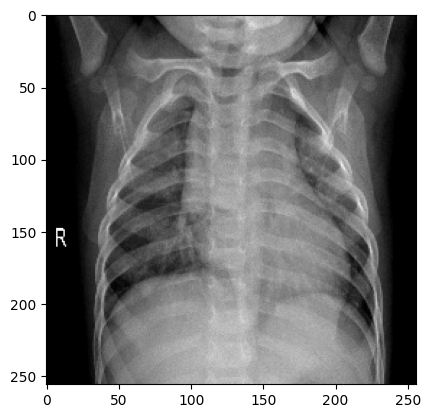

In [81]:
os.listdir(test_path)

os.listdir(train_path)

os.listdir(train_path+'/NORMAL')[0]

normal= train_path+'/NORMAL/' + 'IM-0128-0001.jpeg'

normal_img = imread(normal)
plt.imshow(normal_img, cmap='gray')

image_shape = np.expand_dims(normal_img,-1).shape


# image_shape = (256, 256, 1)
print(image_shape)

In [82]:
print(normal_img.max())
print(normal_img.min())



print(len(os.listdir(train_path+'/NORMAL/')))
print(len(os.listdir(train_path + '/PNEUMONIA/')))
print(len(os.listdir(test_path+'/NORMAL/')))
print(len(os.listdir(test_path + '/PNEUMONIA/')))

255
0
1341
3875
234
390


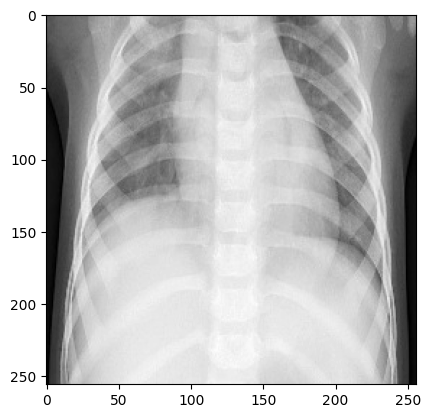

In [83]:
plt.imshow(imread(train_path + '/PNEUMONIA/' + 'person1_bacteria_1.jpeg'), cmap='gray')

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
# plt.imshow(image_gen.random_transform(normal_img))

In [86]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 30, 30, 16)       

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [97]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
326/326 [==============================] - 84s 254ms/step - loss: 0.3712 - accuracy: 0.8349 - val_loss: 0.5944 - val_accuracy: 0.7772
Epoch 2/10
326/326 [==============================] - 81s 249ms/step - loss: 0.2438 - accuracy: 0.9005 - val_loss: 0.4343 - val_accuracy: 0.8013
Epoch 3/10
326/326 [==============================] - 81s 248ms/step - loss: 0.2222 - accuracy: 0.9153 - val_loss: 0.4282 - val_accuracy: 0.8333
Epoch 4/10
326/326 [==============================] - 84s 258ms/step - loss: 0.1902 - accuracy: 0.9285 - val_loss: 0.7459 - val_accuracy: 0.7612
Epoch 5/10
326/326 [==============================] - 84s 257ms/step - loss: 0.1849 - accuracy: 0.9300 - val_loss: 0.5897 - val_accuracy: 0.7644
